STOCK PREDICTION USING STACKED LSTM

In [33]:
import tensorflow as tf
import pandas_datareader as pdr
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from numpy import array
from sklearn.metrics import mean_squared_error

In [34]:
tf.test.gpu_device_name()

'/device:GPU:0'

DATA COLLECTION

In [35]:
key="917e8563913f716da22b9b62f8a06319e52effe6"

In [36]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-36-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [37]:
df.to_csv('AAPL.csv')

In [38]:
df=pd.read_csv('AAPL.csv')

In [39]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-11-12 00:00:00+00:00,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.0,1.0
1,AAPL,2018-11-13 00:00:00+00:00,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.0,1.0
2,AAPL,2018-11-14 00:00:00+00:00,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.0,1.0
3,AAPL,2018-11-15 00:00:00+00:00,191.41,191.97,186.90,188.39,46478801,45.987043,46.121585,44.903496,45.261475,185915204,0.0,1.0
4,AAPL,2018-11-16 00:00:00+00:00,193.53,194.97,189.46,190.50,36928253,46.496381,46.842347,45.518547,45.768411,147713012,0.0,1.0


In [40]:
df1=df.reset_index()['close']

PREPROCESSING

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [42]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [43]:
training_size,test_size

(816, 440)

In [44]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [45]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [46]:
print(x_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [47]:
print(x_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [48]:
x_train =x_train.reshape(x_train.shape[0], x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

STACKED LSTM MODEL

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=6)

Epoch 1/100
120/120 [==============================] - 10s 24ms/step - loss: 0.0118 - val_loss: 0.0014
Epoch 2/100
120/120 [==============================] - 2s 15ms/step - loss: 0.0075 - val_loss: 5.2808e-04
Epoch 3/100
120/120 [==============================] - 2s 15ms/step - loss: 0.0051 - val_loss: 2.6821e-04
Epoch 4/100
120/120 [==============================] - 3s 22ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 5/100
120/120 [==============================] - 2s 17ms/step - loss: 0.0050 - val_loss: 2.0181e-04
Epoch 6/100
120/120 [==============================] - 2s 19ms/step - loss: 0.0037 - val_loss: 1.5903e-04
Epoch 7/100
120/120 [==============================] - 3s 25ms/step - loss: 0.0033 - val_loss: 1.8216e-04
Epoch 8/100
120/120 [==============================] - 2s 19ms/step - loss: 0.0030 - val_loss: 6.9319e-04
Epoch 9/100
120/120 [==============================] - 3s 21ms/step - loss: 0.0032 - val_loss: 2.7974e-04
Epoch 10/100
120/120 [==============================]

In [52]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 6ms/step


In [53]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [54]:
math.sqrt(mean_squared_error(y_train,train_predict))

218.49975855793983

In [55]:
math.sqrt(mean_squared_error(y_test,test_predict))

161.06479238475862

PLOTTING OF TRAINING DATA AND TESTING DATA PREDICTION

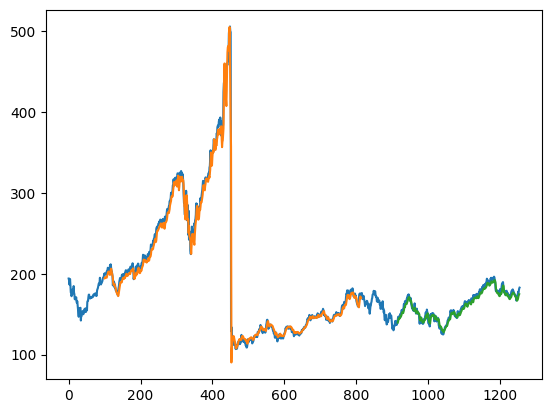

In [56]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

STOCK FORECASTING - FUTURE 30 DAYS

In [59]:
len(test_data)

440

In [60]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
list_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extend(yhat.tolist())
        i=i+1
print(list_output)

0 day input [0.17257358 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008
 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273
 0.16758923 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384
 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.17880584 0.17541391
 0.17109491 0.16702974 0.16344279 0.16032678 0.15760127 0.15515913
 0.15289368 0.15071499 0.14855802 0.14638469 0.14418152 0.14195451
 0.13972244 0.13751028 0.13534352 0.13324402 0.13122773 0.12930396
 0.12747595 0.12574193 0.12409683 0.1225336  0.12104461 0.11962241
 0.11826044 0.11695322 0.11569646 0.11448681 0.11332185 0.11219966
 0.11111881 0.11007797 0.10907599 0.10811167 0.10718381 0.10629117
 0.10543251 0.10460654 0.10381204 0.10304777 0.10231259 0.10160542
 0.10092517 0.10027086 0.09964156 0.09903639 0.09845

In [67]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
len(df1)

1256

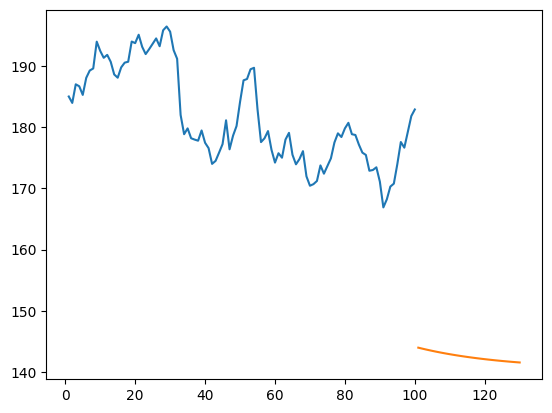

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(list_output))

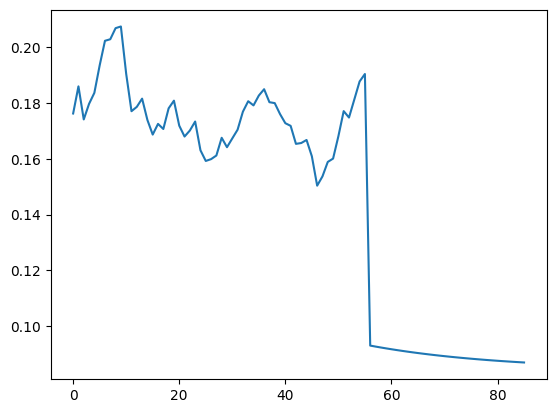

In [70]:
df3=df1.tolist()
df3.extend(list_output)
plt.plot(df3[1200:])

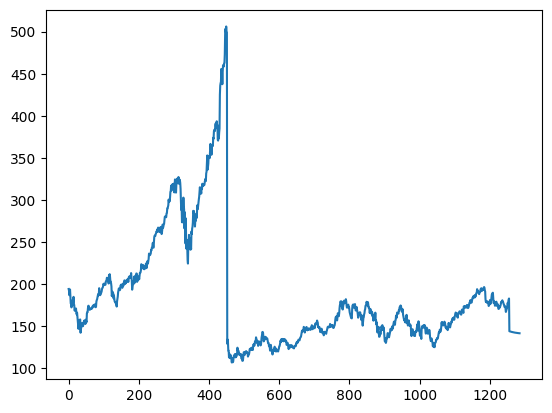

In [71]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)